In [1]:
import os
import tempfile
import scanpy as sc

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warn

In [2]:
import seaborn as sns
import torch

In [3]:
import scvi

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset

In [4]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

[rank: 0] Seed set to 0


Last run with scvi-tools version: 1.2.0


In [5]:
sc.set_figure_params(figsize=(6, 6), frameon=False)
sns.set_theme()
torch.set_float32_matmul_precision("high")
save_dir = "/groups/tanaka/People/current/jiwang/projects/heart_regeneration/results/cross_species_20240220/scvi_out/"

%config InlineBackend.print_figure_kwargs={"facecolor": "w"}
%config InlineBackend.figure_format="retina"

In [6]:
## start to import or download the data
#adata = scvi.data.heart_cell_atlas_subsampled(save_path=save_dir)
adata = sc.read_h5ad(os.path.join(save_dir, 'nm_mm_ax_scRNAseq_merged_celllabels_v2.h5ad'))

In [7]:
adata

AnnData object with n_obs × n_vars = 104365 × 8917
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nGene', 'nUMI', 'stage', 'time', 'condition', 'tech', 'percent.mito', 'var.ratio.pca', 'nCount_integrated', 'nFeature_integrated', 'integrated_snn_res.0.8', 'integrated_snn_res.0.5', 'FineID', 'BroadID', 'treatment', 'dataset', 'celltypes', 'percent.mt', 'percent.cardio', 'RNA_snn_res.0.6', 'seurat_clusters', 'percent.rediff', 'percent.cell_cycle', 'RNA_snn_res.0.5', 'RNA_snn_res.0.2', 'age', 'injury', 'RNA_snn_res.0.7', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'batch', 'species', 'subtype', 'celltype', 'RNA_snn_res.1', 'annot_clusters', 'my_annot', 'timepoints', 'CellID', 'sample', 'group', 'plate_id', 'CellType', 'SubCluster', 'iscell_dd', 'iscell_ed', 'pANN_0.25_0.02_773', 'DF.classifications_0.25_0.02_773', 'pANN_0.25_0.01_606', 'DF.classifications_0.25_0.01_606', 'pANN_0.25_0.005_511', 'DF.classifications_0.25_0.005_511', 'pANN_0.25_0.005_610', 'DF.classifications_0.25_0.005_610',

In [8]:
adata.obs[['batch']]
adata.obs[['dataset']]
#adata.layers.keys()

dataset
m_nm_Wang2020_P1_1MI_AAACCTGAGAATTGTG    nm_Wang2020
m_nm_Wang2020_P1_1MI_AAGGAGCAGGATCGCA    nm_Wang2020
m_nm_Wang2020_P1_1MI_AAGGAGCGTCTTGATG    nm_Wang2020
m_nm_Wang2020_P1_1MI_ACGGAGAGTAGAGCTG    nm_Wang2020
m_nm_Wang2020_P1_1MI_ACTGAACGTGGCAAAC    nm_Wang2020
...                                              ...
ax_TTTGTTGGTAGCTAGC-1                  ax_Bassat2024
ax_TTTGTTGGTCTAACCT-1                  ax_Bassat2024
ax_TTTGTTGGTCTAGCTT-1                  ax_Bassat2024
ax_TTTGTTGGTGTGCAAC-1                  ax_Bassat2024
ax_TTTGTTGGTTCCAGGG-1                  ax_Bassat2024

[104365 rows x 1 columns]

In [9]:
sc.pp.filter_genes(adata, min_counts=3)

In [10]:
adata.layers["counts"] = adata.X.copy()  # preserve counts
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata  # freeze the state in `.raw`

In [11]:
adata

AnnData object with n_obs × n_vars = 104365 × 8917
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nGene', 'nUMI', 'stage', 'time', 'condition', 'tech', 'percent.mito', 'var.ratio.pca', 'nCount_integrated', 'nFeature_integrated', 'integrated_snn_res.0.8', 'integrated_snn_res.0.5', 'FineID', 'BroadID', 'treatment', 'dataset', 'celltypes', 'percent.mt', 'percent.cardio', 'RNA_snn_res.0.6', 'seurat_clusters', 'percent.rediff', 'percent.cell_cycle', 'RNA_snn_res.0.5', 'RNA_snn_res.0.2', 'age', 'injury', 'RNA_snn_res.0.7', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'batch', 'species', 'subtype', 'celltype', 'RNA_snn_res.1', 'annot_clusters', 'my_annot', 'timepoints', 'CellID', 'sample', 'group', 'plate_id', 'CellType', 'SubCluster', 'iscell_dd', 'iscell_ed', 'pANN_0.25_0.02_773', 'DF.classifications_0.25_0.02_773', 'pANN_0.25_0.01_606', 'DF.classifications_0.25_0.01_606', 'pANN_0.25_0.005_511', 'DF.classifications_0.25_0.005_511', 'pANN_0.25_0.005_610', 'DF.classifications_0.25_0.005_610',

In [12]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=3000,
    subset=True,
    layer="counts",
    flavor="seurat_v3",
    batch_key="dataset",
)

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [13]:
scvi.model.SCVI.setup_anndata(
    adata,
    layer="counts",
    categorical_covariate_keys=["species", 'dataset']
    #continuous_covariate_keys=["percent_mito", "percent_ribo"],
)

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [14]:
#model = scvi.model.SCVI(adata)
model = scvi.model.SCVI(adata, n_layers=3, n_latent=40, n_hidden=256, dropout_rate = 0.1, gene_likelihood="nb")

In [15]:
model

SCVI model with the following parameters: 
n_hidden: 256, n_latent: 40, n_layers: 3, dropout_rate: 0.1, dispersion: gene, gene_likelihood: nb, 
latent_distribution: normal.
Training status: Not Trained
Model's adata is minified?: False

In [16]:
model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
SLURM auto-requeueing enabled. Setting signal handlers.
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Epoch 77/77: 100%|██████████| 77/77 [51:28<00:00, 47.83s/it, v_num=1, train_loss_step=1e+3, train_loss_epoch=1.03e+3]   

`Trainer.fit` stopped: `max_epochs=77` reached.


Epoch 77/77: 100%|██████████| 77/77 [51:28<00:00, 40.12s/it, v_num=1, train_loss_step=1e+3, train_loss_epoch=1.03e+3]


In [17]:
model_dir = os.path.join(save_dir, "scvi_model_ax_nm_mm_scANVI")
model.save(model_dir, overwrite=True)

In [18]:
model = scvi.model.SCVI.load(model_dir, adata=adata)

INFO     File                                                                                                      
         /groups/tanaka/People/current/jiwang/projects/heart_regeneration/results/cross_species_20240220/scvi_out/s
         cvi_model_ax_nm_mm_scANVI/model.pt already downloaded                                                     


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

In [19]:
SCVI_LATENT_KEY = "X_scVI"
latent = model.get_latent_representation()
adata.obsm[SCVI_LATENT_KEY] = latent
latent.shape

(104365, 40)

In [20]:
adata.obs[['celltype']]

celltype
m_nm_Wang2020_P1_1MI_AAACCTGAGAATTGTG    Immune
m_nm_Wang2020_P1_1MI_AAGGAGCAGGATCGCA    Immune
m_nm_Wang2020_P1_1MI_AAGGAGCGTCTTGATG       EPI
m_nm_Wang2020_P1_1MI_ACGGAGAGTAGAGCTG    Immune
m_nm_Wang2020_P1_1MI_ACTGAACGTGGCAAAC    Immune
...                                         ...
ax_TTTGTTGGTAGCTAGC-1                        EC
ax_TTTGTTGGTCTAACCT-1                        EC
ax_TTTGTTGGTCTAGCTT-1                        CM
ax_TTTGTTGGTGTGCAAC-1                        EC
ax_TTTGTTGGTTCCAGGG-1                  Neu_DYSF

[104365 rows x 1 columns]

In [21]:
#adata_subset = adata[adata.obs.celltype == "CM"]
#latent_subset = model.get_latent_representation(adata_subset)
#latent.shape

In [22]:
#denoised = model.get_normalized_expression(adata_subset, library_size=1e4)
#denoised.iloc[:5, :5]

In [23]:
SCVI_NORMALIZED_KEY = "scvi_normalized"
adata.layers[SCVI_NORMALIZED_KEY] = model.get_normalized_expression(library_size=10e4)

In [24]:
SCVI_MDE_KEY = "X_scVI_MDE"
adata.obsm[SCVI_MDE_KEY] = scvi.model.utils.mde(adata.obsm[SCVI_LATENT_KEY], accelerator="cpu")

INFO     Using cpu for `pymde.preserve_neighbors`.                                                                 


In [25]:
# Interoperability and visualization with Scanpy

In [39]:
# use scVI latent space for UMAP generation
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)
sc.tl.umap(adata, min_dist=0.3)

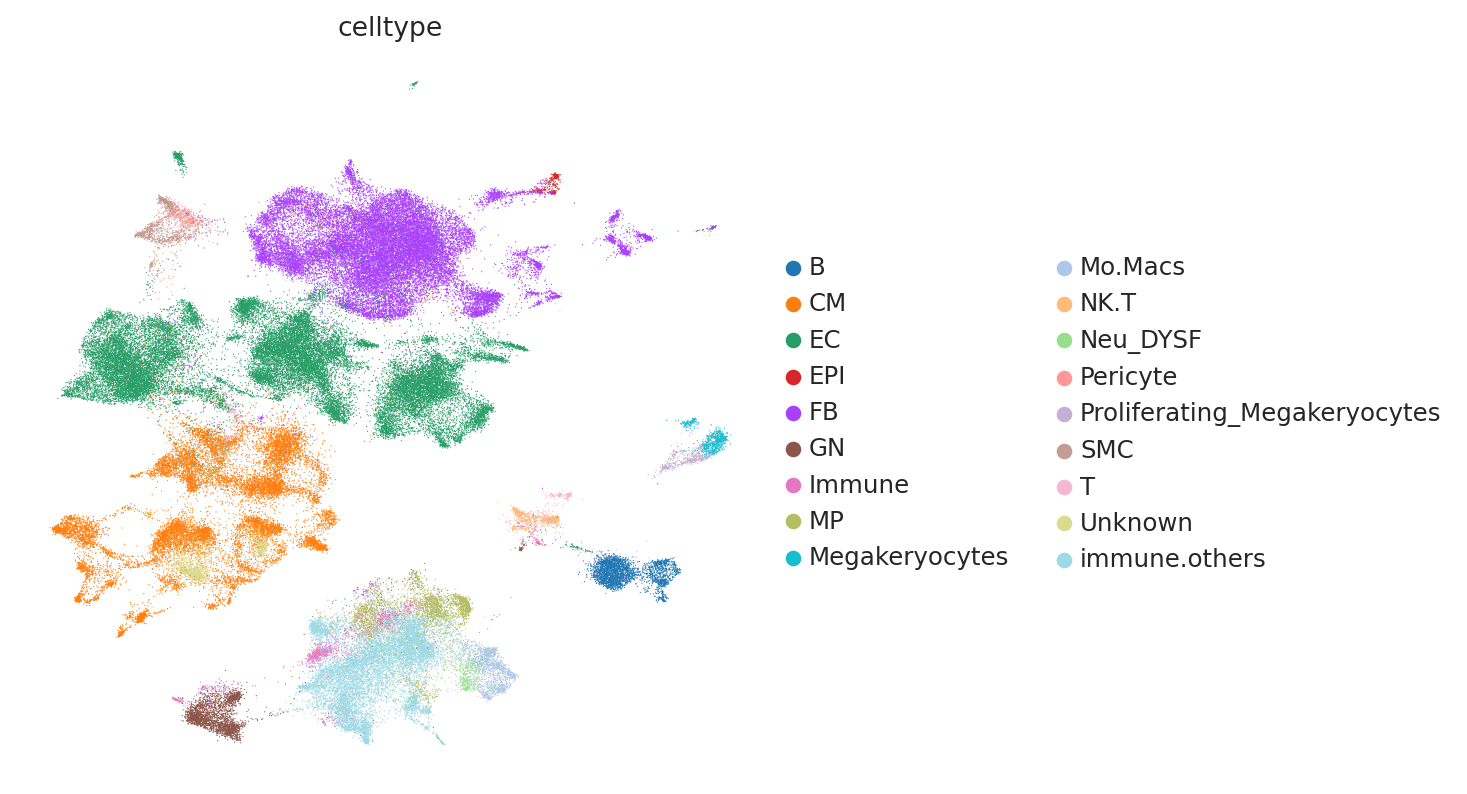

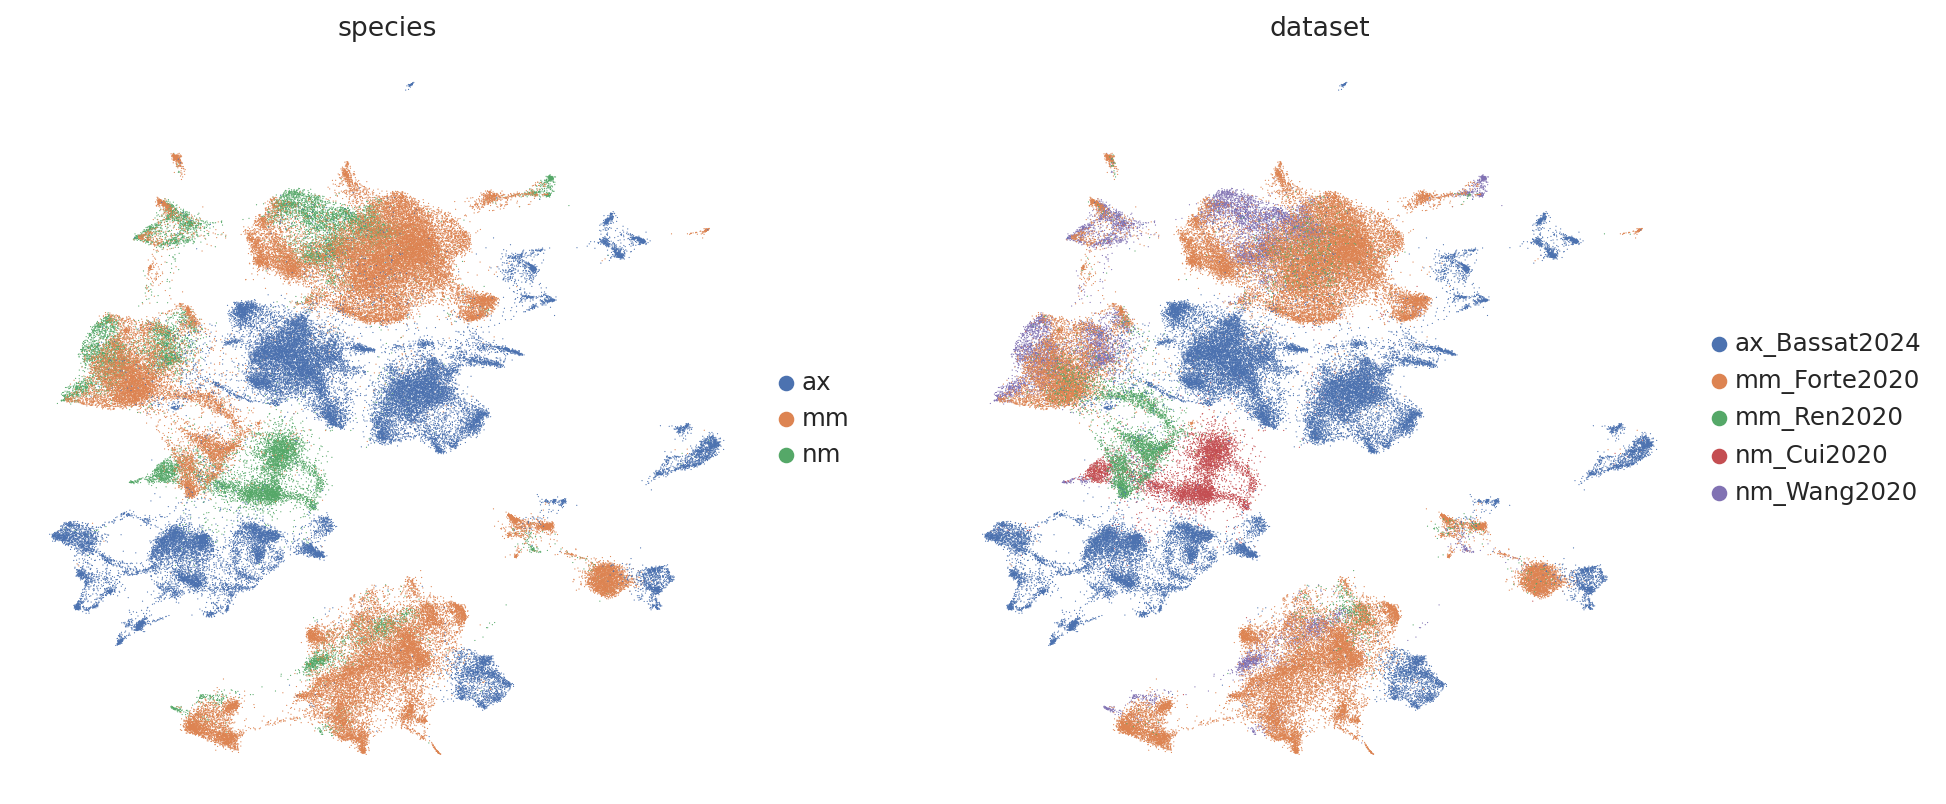

In [40]:
sc.pl.umap(
    adata,
    color=["celltype"],
    frameon=False,
)
sc.pl.umap(
    adata,
    color=["species", "dataset"],
    ncols=2,
    frameon=False,
)

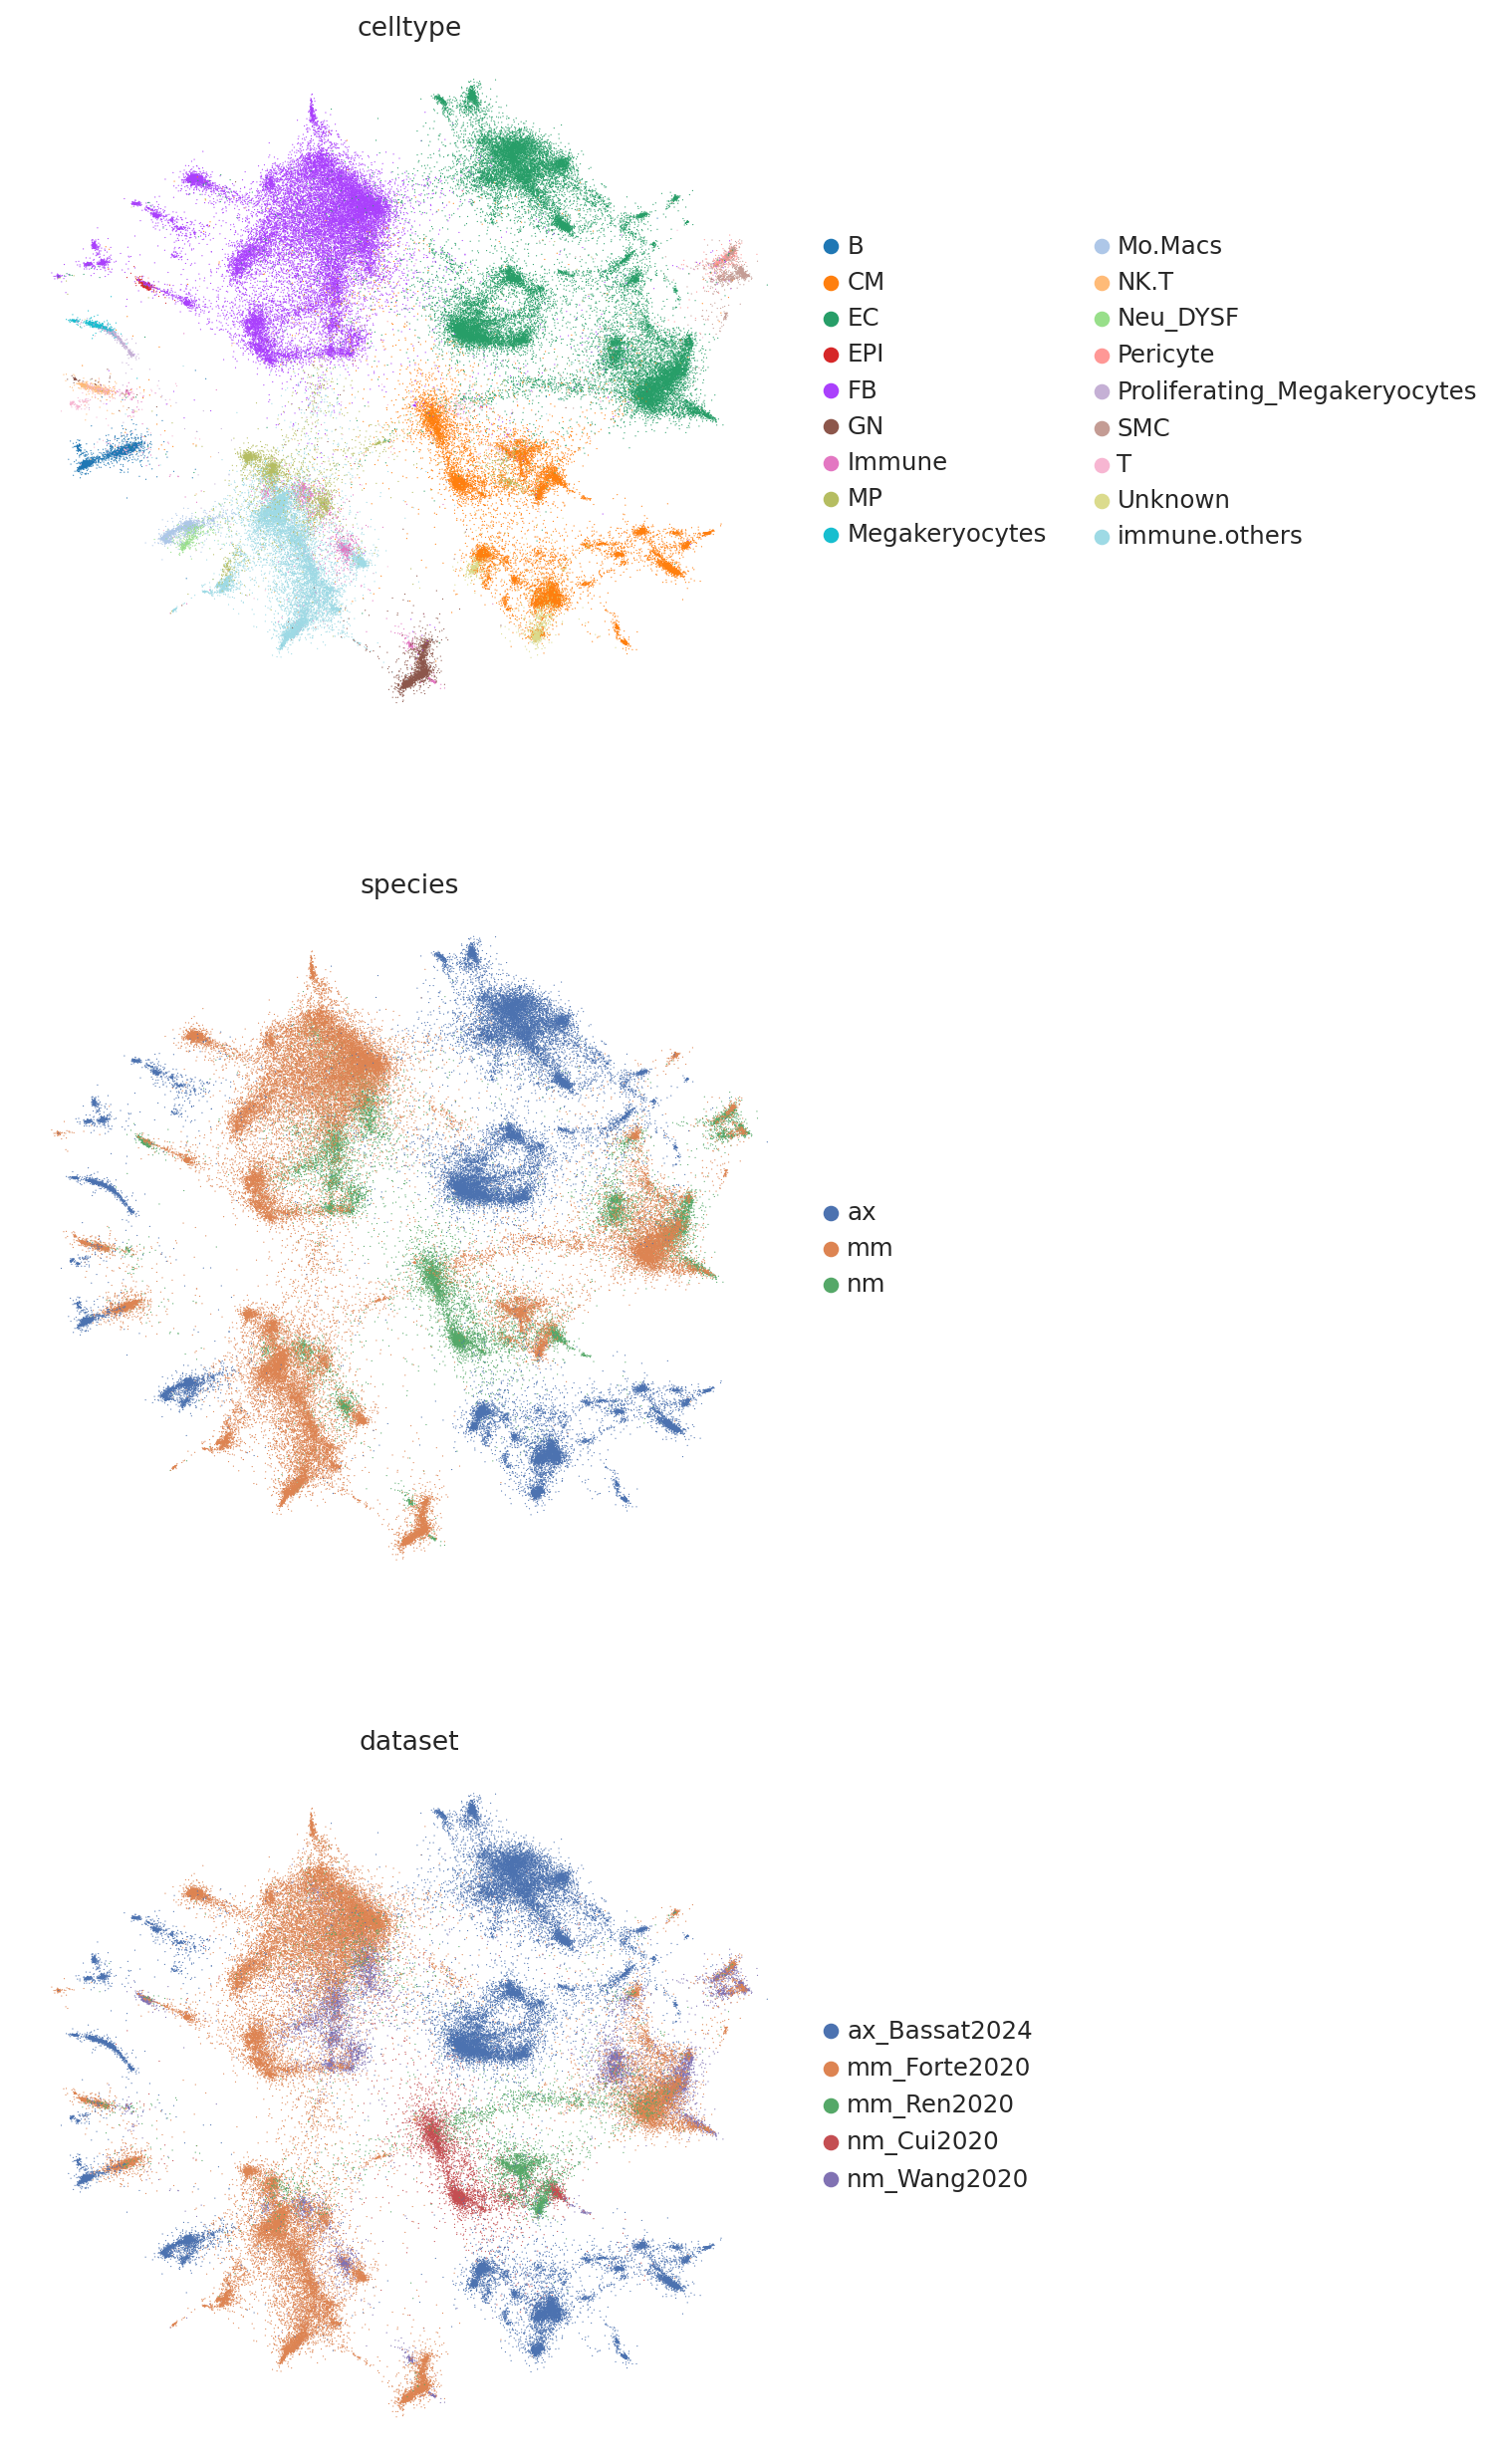

In [41]:
sc.pl.embedding(
    adata,
    basis=SCVI_MDE_KEY,
    color=["celltype", "species", "dataset"],
    frameon=False,
    ncols=1,
)

In [42]:
# run PCA then generate UMAP plots
#sc.tl.pca(adata)
#sc.pp.neighbors(adata, n_pcs=30, n_neighbors=20)
#sc.tl.umap(adata, min_dist=0.3)

In [43]:
#sc.pl.umap(
#    adata,
#    color=["celltype"],
#    frameon=False,
#)
#sc.pl.umap(
#    adata,
#    color=["species", "dataset"],
#    ncols=2,
#    frameon=False,
#)

In [44]:
scanvi_model = scvi.model.SCANVI.from_scvi_model(
    model,
    adata=adata,
    labels_key="celltype",
    unlabeled_category="Unknown",
)

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scvi-tools/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [32]:
scanvi_model.train(max_epochs=20, n_samples_per_label=100)

Epoch 20/20: 100%|██████████| 20/20 [1:22:44<00:00, 254.85s/it, v_num=1, train_loss_step=956, train_loss_epoch=1.02e+3]    

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [1:22:44<00:00, 248.22s/it, v_num=1, train_loss_step=956, train_loss_epoch=1.02e+3]


In [33]:
SCANVI_LATENT_KEY = "X_scANVI"
adata.obsm[SCANVI_LATENT_KEY] = scanvi_model.get_latent_representation(adata)

In [34]:
SCANVI_MDE_KEY = "X_scANVI_MDE"
adata.obsm[SCANVI_MDE_KEY] = scvi.model.utils.mde(adata.obsm[SCANVI_LATENT_KEY], accelerator="cpu")

INFO     Using cpu for `pymde.preserve_neighbors`.                                                                 


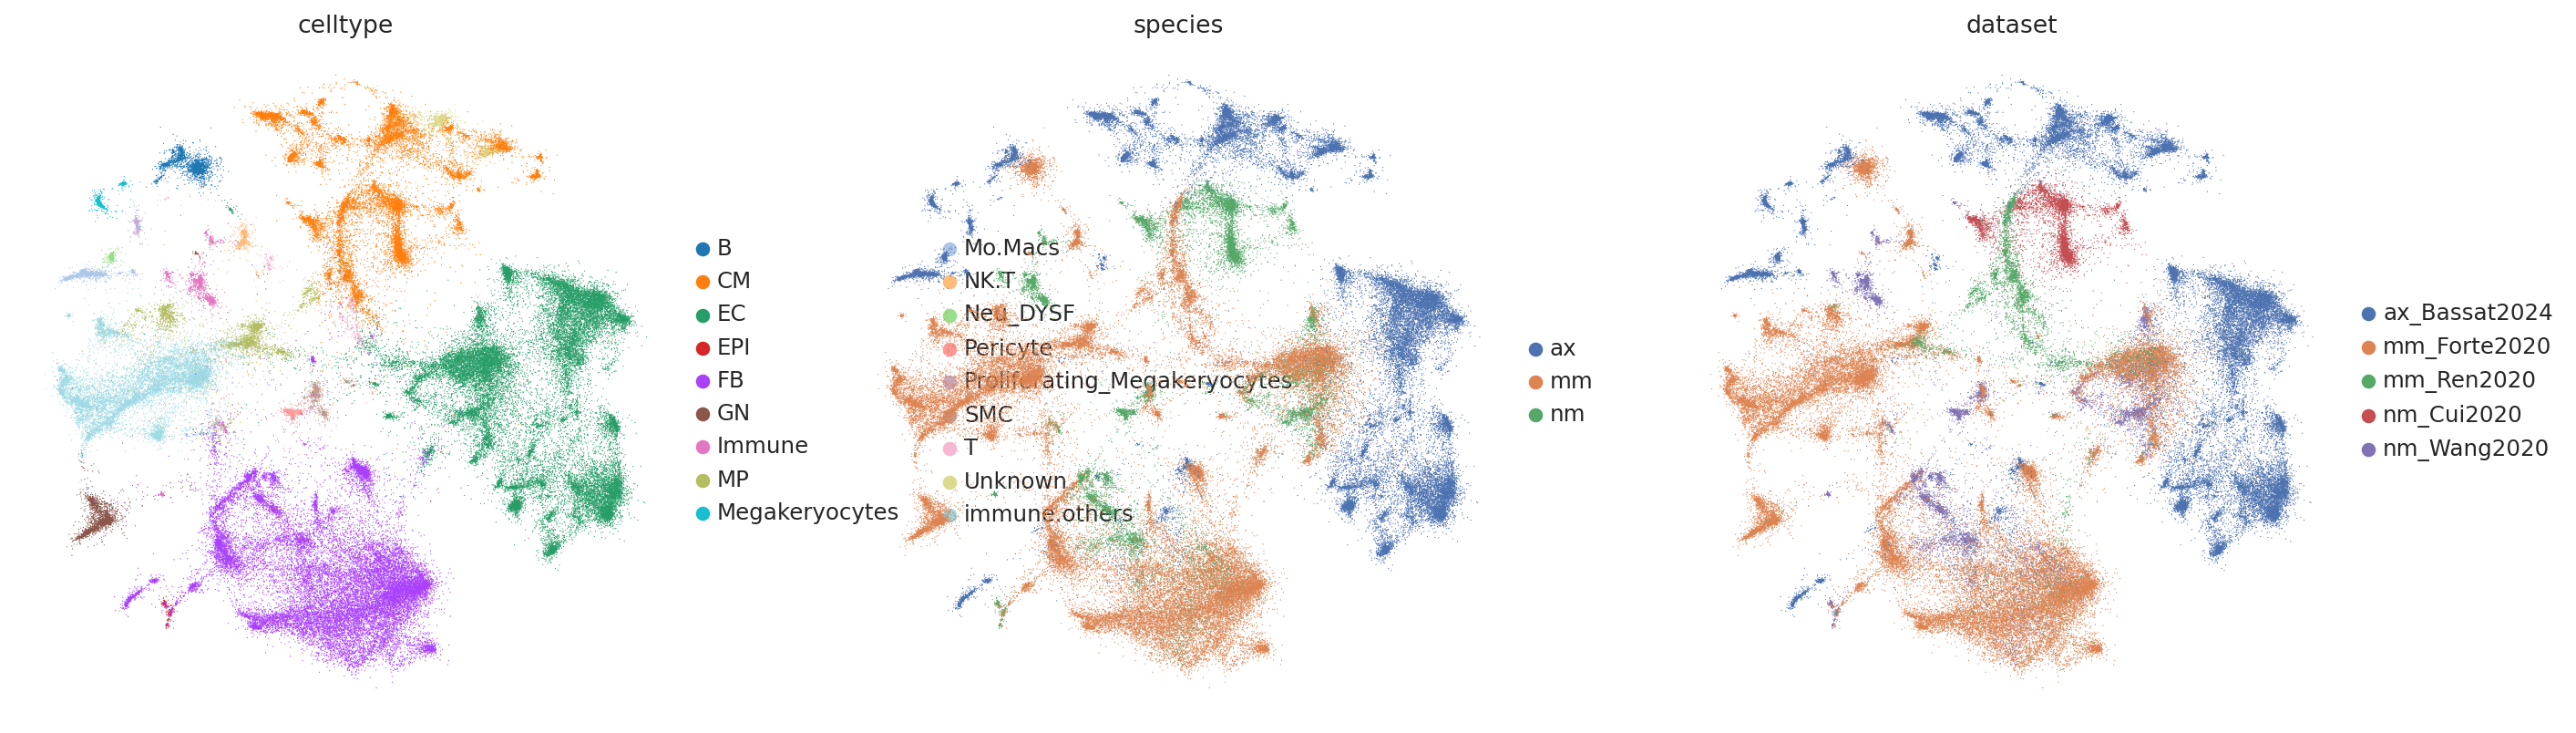

In [35]:
sc.pl.embedding(adata, 
                basis=SCANVI_MDE_KEY, 
                color=["celltype", "species", "dataset"],  ncols=3, frameon=False)

In [36]:
sc.pp.neighbors(adata, use_rep=SCANVI_LATENT_KEY)
sc.tl.umap(adata, min_dist=0.3)

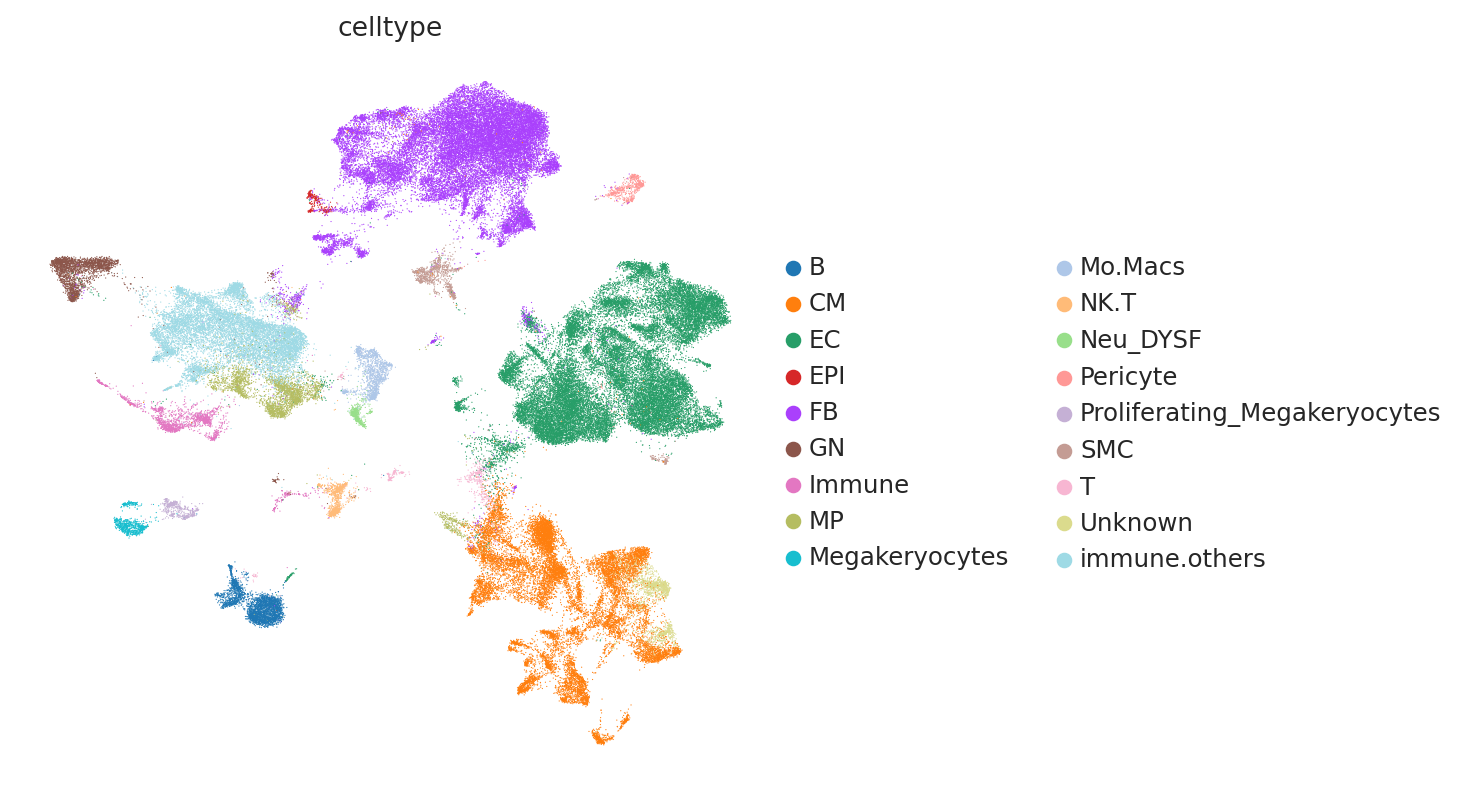

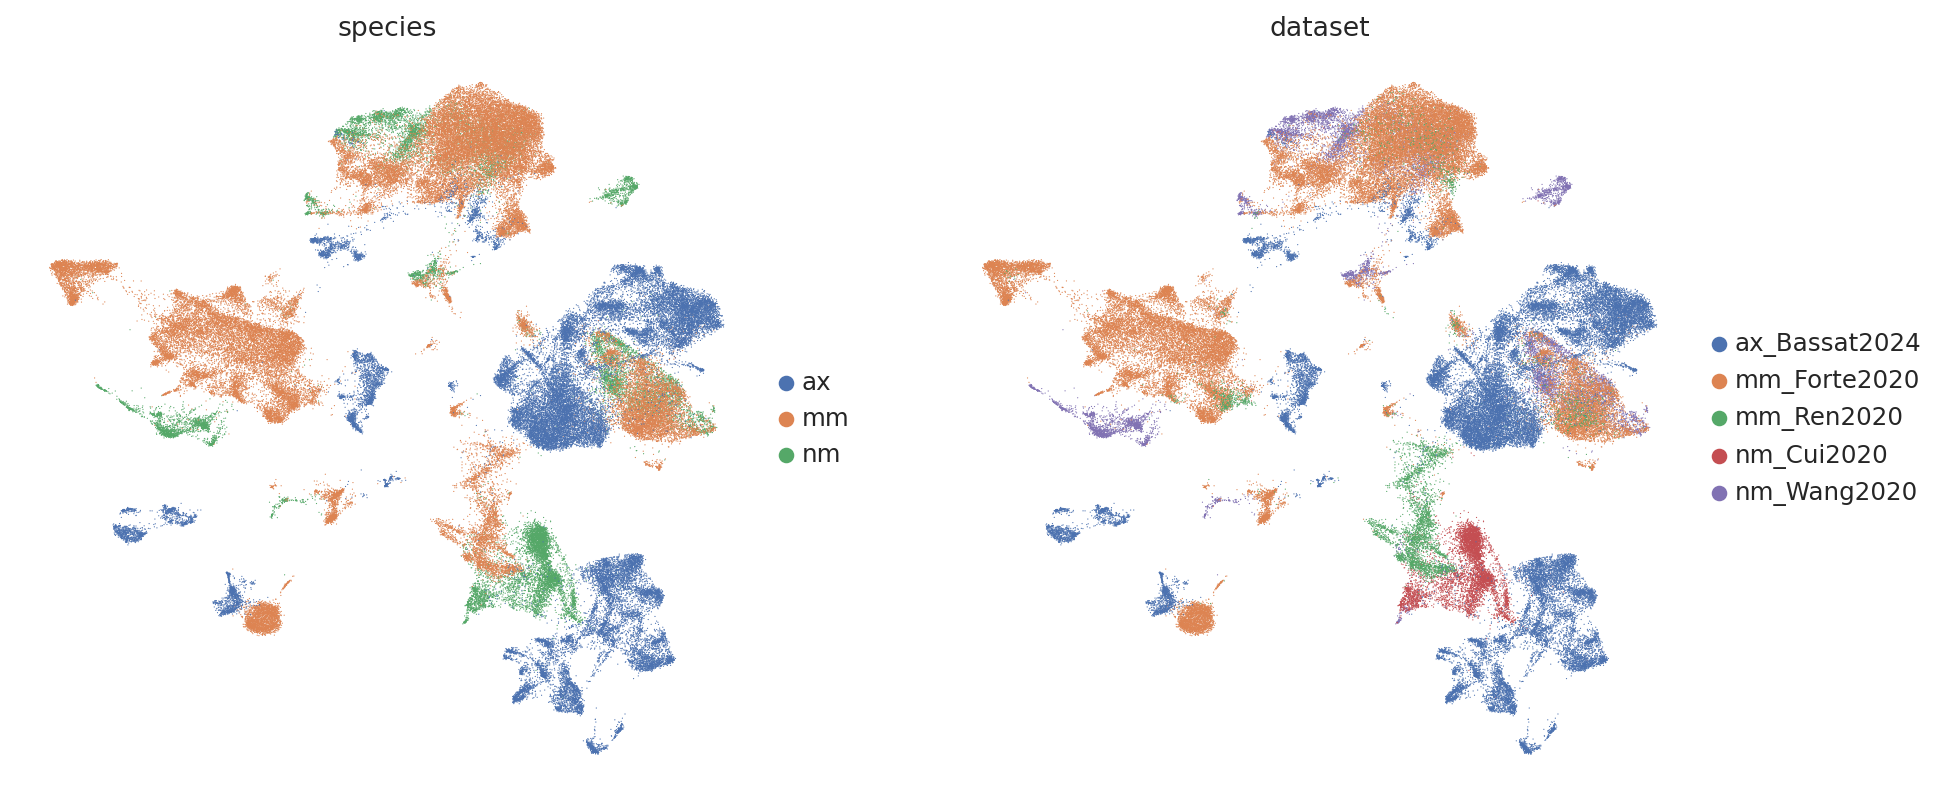

In [37]:
sc.pl.umap(
    adata,
    color=["celltype"],
    frameon=False,
)
sc.pl.umap(
    adata,
    color=["species", "dataset"],
    ncols=2,
    frameon=False,
)

In [38]:
adata.obs.cell_type.head()

AttributeError: 'DataFrame' object has no attribute 'cell_type'

In [ ]:
de_df = model.differential_expression(
    groupby="cell_type", group1="Endothelial", group2="Fibroblast"
)
de_df.head()

In [ ]:
de_df = model.differential_expression(
    groupby="cell_type",
)
de_df.head()

In [ ]:
markers = {}
cats = adata.obs.cell_type.cat.categories
for c in cats:
    cid = f"{c} vs Rest"
    cell_type_df = de_df.loc[de_df.comparison == cid]

    cell_type_df = cell_type_df[cell_type_df.lfc_mean > 0]

    cell_type_df = cell_type_df[cell_type_df["bayes_factor"] > 3]
    cell_type_df = cell_type_df[cell_type_df["non_zeros_proportion1"] > 0.1]

    markers[c] = cell_type_df.index.tolist()[:3]

In [ ]:
sc.tl.dendrogram(adata, groupby="cell_type", use_rep="X_scVI")

In [ ]:
sc.pl.dotplot(
    adata,
    markers,
    groupby="cell_type",
    dendrogram=True,
    color_map="Blues",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
)

In [ ]:
sc.pl.heatmap(
    adata,
    markers,
    groupby="cell_type",
    layer="scvi_normalized",
    standard_scale="var",
    dendrogram=True,
    figsize=(8, 12),
)